[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tmollick95/iMapInvasives/blob/master/Code/Figures%20and%20figure%20code.ipynb)

### Figures and figure code

### Mount Google Drive to access the datasets

In [ ]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install required Python libraries

In [ ]:
!pip install geopandas
!pip install seaborn
!pip install earthpy

### Importing Python libraries

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from io import BytesIO
import math
import json
from IPython.display import display, HTML

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

### Change the current directory

In [ ]:
# Set the working directory
os.chdir("/content/drive/My Drive/iMapInvasives_datasets")

# Verify the current working directory
print("Current working directory:", os.getcwd())
os.listdir() # Check files in the directory

Current working directory: /content/drive/My Drive/iMapInvasives_datasets


['New_York_iMap_confirmed_records_from_year_2000.csv',
 'iMapInvasives_confirmed_reports',
 'USA_Shapefile',
 "Google StreetView iMap records'",
 'Output_Spotted_lanternfly_500_species_confirmed_records_using_VisionAPI.xlsx',
 'Uconfirmed_points_NY_correct.csv',
 'Spotted_Lanternfly_output_preprocessed.xlsx',
 'Figures',
 'VisionAPI result for iMap images',
 'Good quality photos for ML identification.jpg',
 'Bad photo for ML identiication.jpg',
 'confirmed_imap_records_nys.png',
 'Confirmed_imap_records_nys.png',
 'Combined Score for Correct and Incorrect Identifications.png',
 'Scatter_Plot_Combined_vs_Geo_Score.png',
 'Geo Score for Correct and Incorrect Identifications.png']

### Map the confirmed records of iMapInvasives of the New York State
Get the NY_Presence_point_confirm.shp shapefile from https://drive.google.com/drive/folders/1DeRGgMZagojDltKY99oYusAsaqRV7ZMs?usp=drive_link Google Drive link. Extract the Zip file and change the directory to run this code.

In [ ]:
path_to_shapefile = "/content/drive/My Drive/iMapInvasives_datasets/iMapInvasives_confirmed_reports/NY_Presence_point_confirm.shp"
slf = gpd.read_file(path_to_shapefile, encoding='ISO-8859-1')
slf.head()

,OBJECTID,scientific,common_nam,observatio,number_fou,observer,has_photo_,imap_id,species_ty,growth_hab,...,jurisdic_1,project_id,approximat,approxim_1,present_sp,habitat_ty,presence_i,Longitude,Latitude,geometry
0,4,Lycorma delicatula,Spotted Lanternfly,2022-08-01,0,Charles Holmes,1,1285436,Animal,Plant Pest,...,1499,None,0,None,1295072,Terrestrial,1285436,-64.306039,2.983061,POINT (1695337.874 335578.009)
1,5,Phalaris arundinacea,Reed Canarygrass,2022-08-08,0,Priscilla Titus,1,1285675,Plant,Graminoid,...,1410,399,0,None,1295381,Terrestrial,1285675,-64.499116,4.378488,POINT (1671642.409 492231.254)
2,6,Elaeagnus umbellata,Autumn Olive,2022-08-21,0,Monika Wood,1,1288329,Plant,Shrub,...,1146,1025,0,None,1298280,Terrestrial,1288329,-66.422054,3.560139,POINT (1456256.162 397977.851)
3,1411,Rhamnus cathartica,Common Buckthorn,2016-07-13,0,Julie Grinstead,1,494484,Plant,Tree,...,1144,376,0,None,494484,Terrestrial,494484,-66.058779,4.529017,POINT (1495874.55 506776.864)
4,1674,Euonymus europaeus,European Spindletree,2016-10-04,0,Danielle Slavis,1,510862,Plant,Shrub,...,1128,None,0,None,510862,Terrestrial,510862,-65.926975,4.620081,POINT (1510547.195 517154.886)


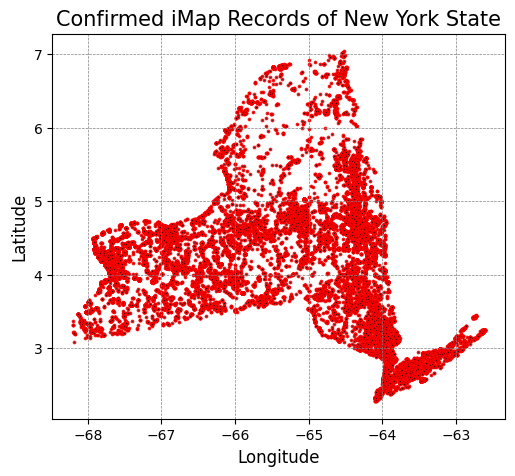

In [ ]:
from shapely.geometry import Point


# Create a GeoDataFrame with points from Longitude and Latitude columns
geometry = [Point(xy) for xy in zip(slf['Longitude'], slf['Latitude'])]
slf_corrected = gpd.GeoDataFrame(slf, geometry=geometry)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the points with specified color and edge
slf_corrected.plot(ax=ax, color='black', edgecolor='red', markersize=3, alpha=0.8)

# Set the x and y axis labels to Longitude and Latitude
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_title("Confirmed iMap Records of New York State", fontsize=15)

# Add a grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Save the plot as a PNG file with 300 DPI
output_path = "Confirmed_imap_records_nys.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Read output excel file from iNaturalist VisionAPI


In [ ]:
df = pd.read_excel("Spotted_Lanternfly_output_preprocessed.xlsx")
df.head()

,S.L.,imaplink,presenceId,presentSpeciesId,iMapPhoto,imap_sci,imap_com,imap_record_taxon,inatlink,inat_sci,...,inat_taxon,geo_score,com_score,visual_model,species_label,com_status,Verification,Photo_quality,Category,Unnamed: 20
0,1,View,1350954,1368225,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Halyomorpha halys,...,81923,31.59,25.49,1,0,NaN,iMap says correct,Bad-Multiple focused species,Photo not cropped,Showing different species suggestion because t...
1,2,View,1441530,1455989,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,324726,7.95,91.49,1,1,NaN,Both iMap and iNat correct,Good photo,Likely correct identification,NaN
2,3,View,1180108,1187956,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,324726,81.28,99.96,1,1,NaN,Both iMap and iNat correct,Good photo,Likely correct identification,NaN
3,4,View,1355266,1372898,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,324726,81.28,100.00,1,1,NaN,Both iMap and iNat correct,Good photo,Likely correct identification,NaN
4,5,View,1303110,1313527,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,324726,81.28,99.74,1,1,NaN,Both iMap and iNat correct,Good photo,Likely correct identification,NaN


### Scatter plot of combined score vs geo score

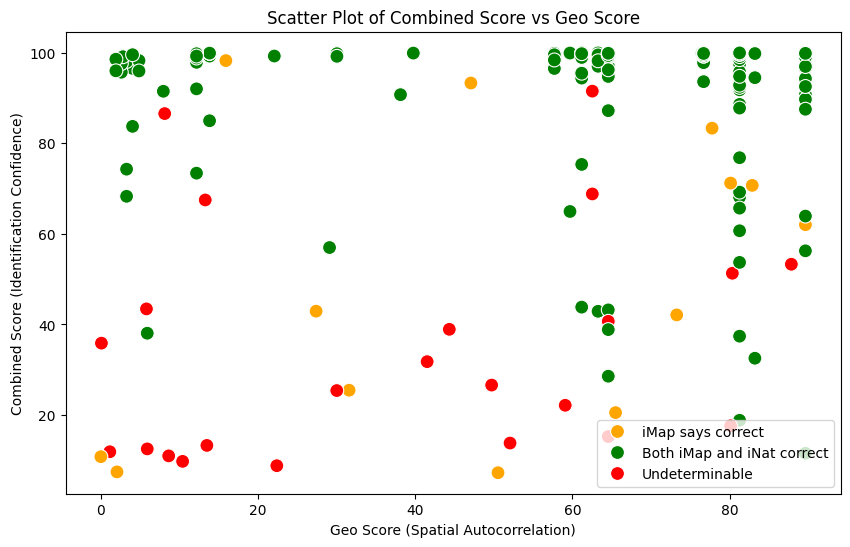

In [ ]:
# Scatter plot: com_score vs. geo_score colored by species_label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='geo_score', y='com_score', hue='Verification', palette={'iMap says correct': 'orange', 'Both iMap and iNat correct': 'green', 'Undeterminable': 'red'}, s=100)
plt.title('Scatter Plot of Combined Score vs Geo Score')
plt.xlabel('Geo Score (Spatial Autocorrelation)')
plt.ylabel('Combined Score (Identification Confidence)')
plt.legend(
    title='',
    loc='lower right')

# Save the figure in 300 dpi
plt.savefig('Scatter_Plot_Combined_vs_Geo_Score.png', dpi=300)
plt.show()

The scatter plot illustrates the relationship between geo score (spatial autocorrelation) and combined score (identification confidence) for species identifications.

1. Correct identifications (green dots): These are predominantly found at higher combined scores (above 60) and are spread across a range of geo scores, particularly at mid-to-high values. This demonstrates the reliability of higher combined scores for accurate species identification.

2. Incorrect identifications (yellow and red dots): Most of these cluster at lower combined scores, but some outliers with high combined scores exist. These anomalies are attributed to either mislabeling in the iMapInvasives dataset or the presence of complex photo characteristics, such as multiple species or cluttered backgrounds, causing the machine learning algorithm to focus on non-target species.

Combined score as a predictor: Incorrect identifications (both red and yellow) cluster more strongly at lower combined scores, regardless of geo score. This highlights the combined score as a more reliable predictor of identification accuracy than geo score alone.

The plot highlights the effectiveness of combined scores in predicting identification accuracy while also underscoring the importance of addressing dataset mislabeling and improving image quality to mitigate issues arising from complex environments and multiple species in photos.

### Combined Score

<ipython-input-11-714d025e915b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


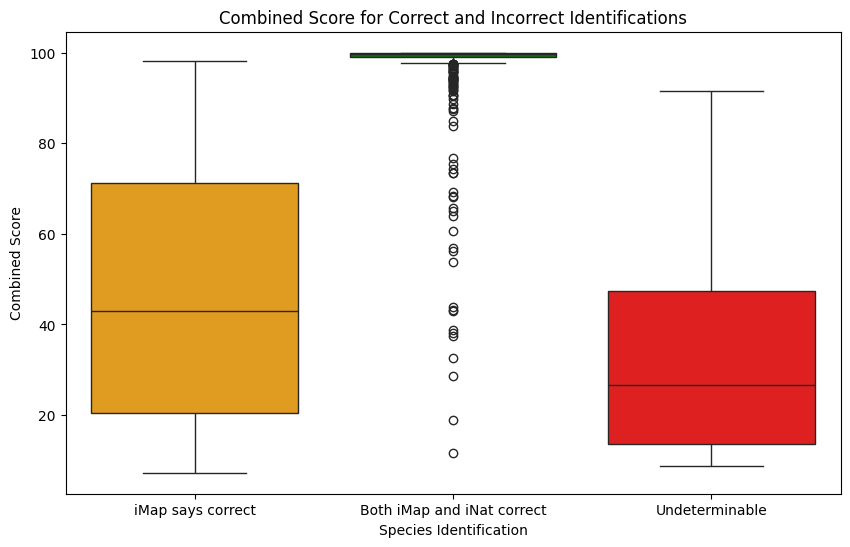

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Verification',
    y='com_score',
    palette={
        'iMap says correct': 'orange',
        'Both iMap and iNat correct': 'green',
        'Undeterminable': 'red'
    },
    order=['iMap says correct', 'Both iMap and iNat correct', 'Undeterminable'],
    dodge=False  # Ensures the boxes for each category do not overlap
)
plt.title('Combined Score for Correct and Incorrect Identifications')
plt.xlabel("Species Identification")
plt.ylabel('Combined Score')

# Save the figure in 300 dpi
plt.savefig('Combined Score for Correct and Incorrect Identifications.png', dpi=300)
plt.show()


The boxplot shows combined score distributions for three categories:

1. iMap says correct (orange): Scores vary widely (20–80), with a median around 40, indicating moderate confidence but some uncertainty.

2. Both iMap and iNat correct (green): Scores are consistently high (~100), reflecting strong agreement and high confidence in accurate identifications.

3. Undeterminable (red): Scores are low to moderate (20–60), with some high outliers, likely due to dataset mislabeling or complex photo characteristics.

This highlights the reliability of high combined scores for correct identifications and the need for improved data quality to reduce errors in other categories.

### Geo Score

<ipython-input-12-887bb136ee44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


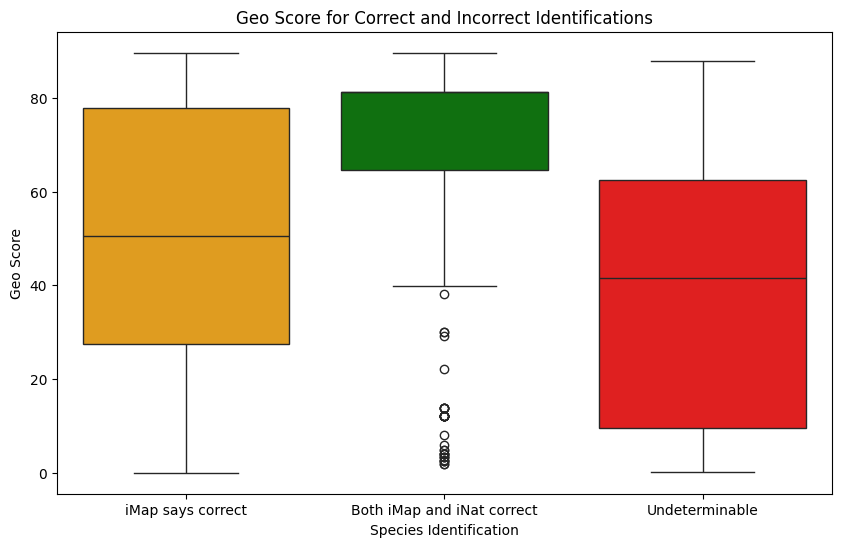

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Verification',
    y='geo_score',
    palette={
        'iMap says correct': 'orange',
        'Both iMap and iNat correct': 'green',
        'Undeterminable': 'red'
    },
    order=['iMap says correct', 'Both iMap and iNat correct', 'Undeterminable'],
    dodge=False  # Ensures the boxes for each category do not overlap
)
plt.title('Geo Score for Correct and Incorrect Identifications')
plt.xlabel("Species Identification")
plt.ylabel('Geo Score')

# Save the figure in 300 dpi
plt.savefig('Geo Score for Correct and Incorrect Identifications.png', dpi=300)
plt.show()

This boxplot illustrates geo score distributions across three verification categories:

1. iMap says correct (orange): Median geo score (~60) with high variability, including some low-score outliers, indicating moderate reliability but potential dataset errors or false positives.

2. Both iMap and iNat correct (green): High median geo score (~80) with minimal variability, confirming strong spatial alignment and reliable identifications.

3. Undeterminable (red): Low median geo score (~40) with significant variability, reflecting uncertainty and potential issues with mislabeling or complex photo characteristics.

Key Insights:
1. High geo scores correlate strongly with correct identifications (green).

2. Variability in the orange and red categories highlights the need for better dataset quality and algorithmic refinement.

### ANOVA Test for setting up threshold for Spotted Lanternfly species

In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming your data is in a DataFrame called `df` with columns 'Verification' and 'com_score'

# Group the data by 'Verification' and extract the scores
imap_correct = df[df['Verification'] == 'iMap says correct']['com_score']
both_correct = df[df['Verification'] == 'Both iMap and iNat correct']['com_score']
undeterminable = df[df['Verification'] == 'Undeterminable']['com_score']

# Perform the one-way ANOVA test
f_statistic, p_value = stats.f_oneway(imap_correct, both_correct, undeterminable)

# Display the results
print("ANOVA Test Results")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in com_score between the categories.")
else:
    print("There is no significant difference in com_score between the categories.")


ANOVA Test Results
F-Statistic: 287.4140779461973
P-Value: 1.0342055555297142e-81
There is a significant difference in com_score between the categories.


The ANOVA test shows a highly significant difference in combined score (com_score) across the verification categories ("iMap says correct," "Both iMap and iNat correct," and "Undeterminable").

  F-Statistic: 287.41, indicating substantial variance between groups.
  P-Value: 1.03e-81, confirming the difference is statistically significant.

This result validates that com_score varies meaningfully across categories, supporting its use as a reliable indicator for classification accuracy.

### Tukey's HSD Test for pairwise comparison

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Tukey's HSD Test
tukey = pairwise_tukeyhsd(endog=df['com_score'], groups=df['Verification'], alpha=0.05)
print(tukey)

# Convert Tukey's results to a DataFrame
pairwise_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Rename columns for clarity
pairwise_results.columns = ['Group1', 'Group2', 'Mean Difference', 'P-Value', 'Lower CI', 'Upper CI', 'Reject Null']

# Convert numerical columns to float
pairwise_results['Mean Difference'] = pairwise_results['Mean Difference'].astype(float)
pairwise_results['Lower CI'] = pairwise_results['Lower CI'].astype(float)
pairwise_results['Upper CI'] = pairwise_results['Upper CI'].astype(float)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
          group1                 group2      meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------------------------
Both iMap and iNat correct    Undeterminable -61.5608    0.0 -68.4413 -54.6804   True
Both iMap and iNat correct iMap says correct -47.3717    0.0 -56.4212 -38.3221   True
            Undeterminable iMap says correct  14.1892 0.0082   3.0358  25.3425   True
-------------------------------------------------------------------------------------


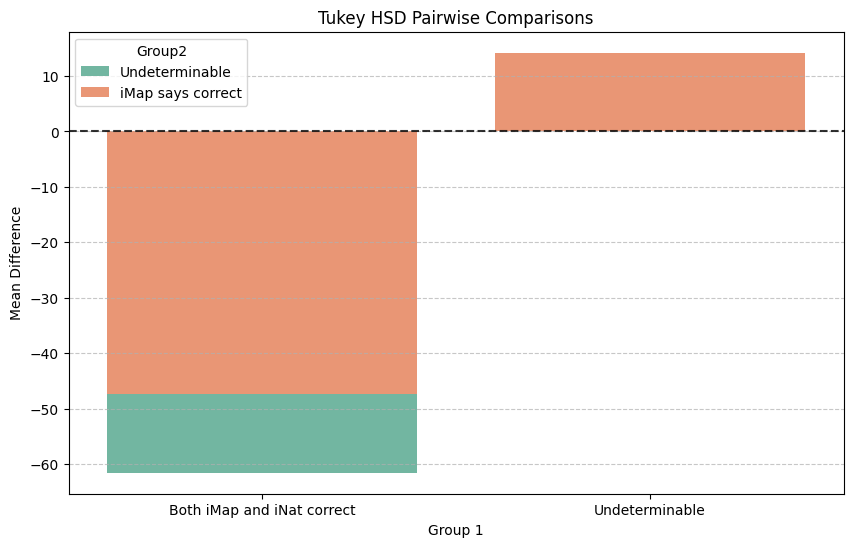

In [ ]:
# Create a bar plot for pairwise comparisons
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pairwise_results,
    x='Group1',
    y='Mean Difference',
    hue='Group2',
    dodge=False,
    palette='Set2'
)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)
plt.title('Tukey HSD Pairwise Comparisons')
plt.ylabel('Mean Difference')
plt.xlabel('Group 1')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(rotation=15)

# Save the figure in 300 dpi
plt.savefig('Tukey HSD Pairwise Comparisons.png', dpi=300)
plt.show()


The bar chart shows pairwise mean differences in com_score between the verification groups:

1. "Both iMap and iNat correct" has significantly higher scores than:
    "Undeterminable" (-61.56) and
    "iMap says correct" (-47.37)
2. "iMap says correct" scores are moderately higher than "Undeterminable" (14.19).

## Insight:
All comparisons are statistically significant. "Both iMap and iNat correct" consistently has the highest scores, confirming it as the most reliable category. "Undeterminable" scores are the lowest, showing the weakest classification accuracy. This validates com_score as a robust metric for distinguishing reliability.

### Set the Threshold Based on Group Differences

In [ ]:
from sklearn.metrics import roc_curve, auc

# Binarize the target variable (1 = correct, 0 = incorrect)
df['is_correct'] = df['Verification'].apply(lambda x: 1 if x == 'Both iMap and iNat correct' else 0)

# Get true labels and scores
y_true = df['is_correct']
y_scores = df['com_score']

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 93.61


### Threshold at the 25th percentile

In [ ]:
# Calculate the 25th percentile of "Both iMap and iNat correct"
threshold = df[df['Verification'] == 'Both iMap and iNat correct']['com_score'].quantile(0.25)
print(f"Threshold (25th percentile): {threshold}")


Threshold (25th percentile): 99.03999999999999


### Validation of Threshold

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Assume 'optimal_threshold' is already calculated from the ROC curve method
optimal_threshold = 50  # Replace this with your calculated threshold

# Create a binary prediction based on the optimal threshold
df['predicted_correct'] = df['com_score'].apply(lambda x: 1 if x >= optimal_threshold else 0)

# True labels: 1 for "Both iMap and iNat correct", 0 otherwise
df['true_correct'] = df['Verification'].apply(lambda x: 1 if x == 'Both iMap and iNat correct' else 0)

# Calculate confusion matrix
conf_matrix = confusion_matrix(df['true_correct'], df['predicted_correct'])
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy, precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(df['true_correct'], df['predicted_correct']))

# Calculate overall accuracy
accuracy = accuracy_score(df['true_correct'], df['predicted_correct'])
print(f"Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[ 24  12]
 [ 10 417]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        36
           1       0.97      0.98      0.97       427

    accuracy                           0.95       463
   macro avg       0.84      0.82      0.83       463
weighted avg       0.95      0.95      0.95       463

Accuracy: 95.25%



The classification using the chosen threshold achieved 95.25% accuracy, with strong performance for classifying "Both iMap and iNat correct" (class 1):

1. Class 1 (Both iMap and iNat correct): High precision (97%), recall (98%), and F1-score (0.97).
2. Class 0 (Not Both iMap and iNat correct): Lower precision (71%) and recall (67%) due to smaller sample size and some misclassifications.
3. Confusion Matrix: 417 true positives, 24 true negatives, 12 false positives, and 10 false negatives.

The threshold effectively classifies correct identifications but could be improved for distinguishing incorrect identifications (class 0).

In [ ]:
threshold = 93.61
df['com_status'] = df['com_score'].apply(lambda x: 'Confirmed' if x >= threshold else 'Unconfirmed')

# Save the updated DataFrame to a new Excel file
output_filename = "Final_output_spotted_lanternfly.xlsx"
df.to_excel(output_filename, index=False)

print(f"Updated dataset saved as '{output_filename}'")

Updated dataset saved as 'Final_output_spotted_lanternfly.xlsx'


### Populate the com_status column based on the threshold

In [ ]:
slf = pd.read_excel("Final_output_spotted_lanternfly.xlsx")
slf.head()

,S.L.,imaplink,presenceId,presentSpeciesId,iMapPhoto,imap_sci,imap_com,imap_record_taxon,inatlink,inat_sci,...,visual_model,species_label,com_status,Verification,Photo_quality,Category,Unnamed: 20,is_correct,predicted_correct,true_correct
0,1,View,1350954,1368225,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Halyomorpha halys,...,1,0,Unconfirmed,iMap says correct,Bad-Multiple focused species,Photo not cropped,Showing different species suggestion because t...,0,0,0
1,2,View,1441530,1455989,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,1,1,Unconfirmed,Both iMap and iNat correct,Good photo,Likely correct identification,NaN,1,1,1
2,3,View,1180108,1187956,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,1,1,Confirmed,Both iMap and iNat correct,Good photo,Likely correct identification,NaN,1,1,1
3,4,View,1355266,1372898,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,1,1,Confirmed,Both iMap and iNat correct,Good photo,Likely correct identification,NaN,1,1,1
4,5,View,1303110,1313527,View,Lycorma delicatula,Spotted Lanternfly,324726,View,Lycorma delicatula,...,1,1,Confirmed,Both iMap and iNat correct,Good photo,Likely correct identification,NaN,1,1,1
